# Experiment data analysis
This notebook contains the resultant graphs for analysis run from `aco_parameters_testing.py` and `compare_algorithms.py`

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
# Load the table from the CSV file
parameters = pd.read_csv('parameter_testing_results.csv')
beta_value = pd.read_csv('beta_testing_results.csv')
ants_value = pd.read_csv('ants_testing_results.csv')
manchester_algo_compare = pd.read_csv('algorithm_comparison_results_manchester.csv')
kyoto_algo_compare = pd.read_csv('algorithm_comparison_results_kyoto_high_traffic.csv')
more_kyoto_algo_compare = pd.read_csv('algorithm_comparison_results.csv')

In [54]:
parameters.head()

,Num_Ants,Beta,Simulation_Time
0,50,2.0,132.0
1,50,3.0,187.0
2,50,4.0,205.0
3,50,5.0,195.0
4,60,2.0,164.0


In [55]:
beta_value.head()

,Ambulance_ID,Beta,Route_Time
0,a1,2.0,205.0
1,a1,2.5,118.0
2,a1,3.0,189.0
3,a1,3.5,226.0
4,a1,4.0,201.0


In [56]:
ants_value.head()

,Ambulance_ID,Num_Ants,Route_Time
0,a1,50,257.0
1,a1,60,218.0
2,a1,70,156.0
3,a1,80,126.0
4,a1,90,189.0


In [57]:
manchester_algo_compare.head()

,Ambulance_ID,Algorithm,Travel_Time,Computation_Time,ACO_Time_Overhead
0,a1,Dijkstra,156.0,0.002740,0
1,a2,Dijkstra,130.0,0.002790,0
2,a4,Dijkstra,172.0,0.002270,0
3,a5,Dijkstra,111.0,0.001120,0
4,a6,Dijkstra,22.0,0.000438,0


In [58]:
kyoto_algo_compare.head()

,Ambulance_ID,Algorithm,Travel_Time,Computation_Time,ACO_Time_Overhead
0,a1,Dijkstra,111.0,0.001419,0.0
1,a2,Dijkstra,158.0,0.001775,0.0
2,a3,Dijkstra,125.0,0.001362,0.0
3,a4,Dijkstra,134.0,0.001679,0.0
4,a5,Dijkstra,208.0,0.002756,0.0


In [59]:
more_kyoto_algo_compare.tail()

,Ambulance_ID,Algorithm,Travel_Time,Computation_Time,ACO_Time_Overhead
15,a1,A* ACO,78.0,0.085841,165.539778
16,a2,A* ACO,99.0,0.236862,133.332006
17,a3,A* ACO,102.0,0.087796,175.952831
18,a4,A* ACO,88.0,0.070873,161.266625
19,a5,A* ACO,173.0,0.221456,178.228808


## Visualising Parameter analysis data
In order to properly select `number_of_ants` and the `beta` value, the following graph is being visualised

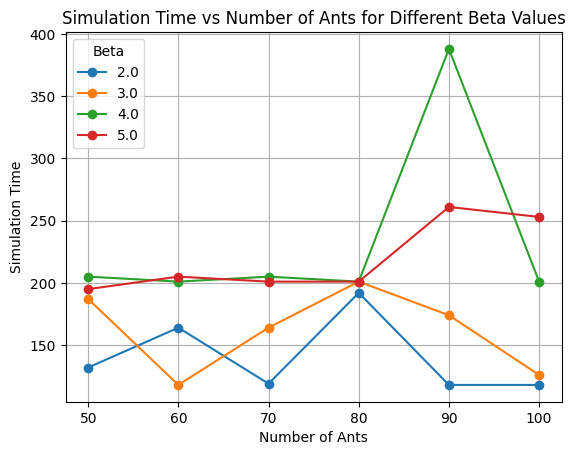

In [60]:
# # Pivot the data to have Num_Ants as the index and Beta values as columns
pivot_parameters = parameters.pivot(index='Num_Ants', columns='Beta', values='Simulation_Time')

# Plot the pivoted dataframe
pivot_parameters.plot(kind='line', marker='o')
plt.xlabel('Number of Ants')
plt.ylabel('Simulation Time')
plt.title('Simulation Time vs Number of Ants for Different Beta Values')
plt.legend(title='Beta')
plt.grid(True)
plt.show()

### Beta Values

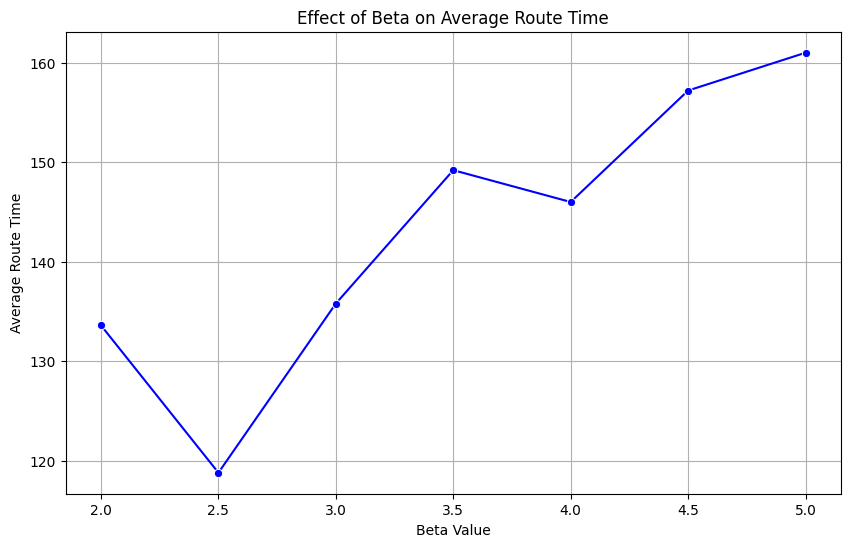

In [61]:
# Compute the average route time across all ambulances for each Beta value
beta_avg = beta_value.groupby("Beta", as_index=False)["Route_Time"].mean()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=beta_avg, x="Beta", y="Route_Time", marker="o", color="b")  # Single line for all ambulances

# Labels and styling
plt.xlabel("Beta Value")
plt.ylabel("Average Route Time")
plt.title("Effect of Beta on Average Route Time")
plt.grid(True)
plt.show()


### Number of Ants

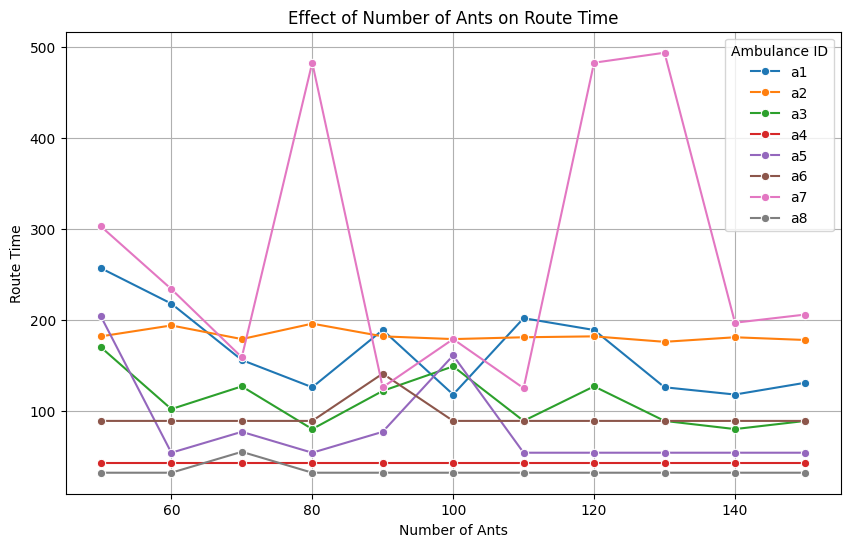

In [62]:
# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=ants_value, x="Num_Ants", y="Route_Time", hue="Ambulance_ID", marker="o")

# Labels and styling
plt.xlabel("Number of Ants")
plt.ylabel("Route Time")
plt.title("Effect of Number of Ants on Route Time")
plt.legend(title="Ambulance ID")
plt.grid(True)
plt.show()

## Travel Time for Each Algorithm

### In Manchester

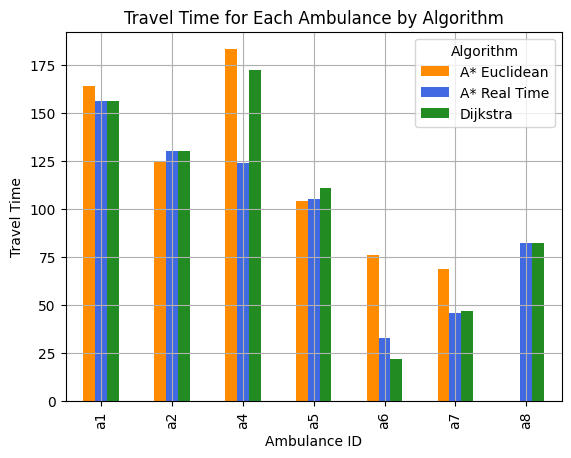

In [63]:
# Pivot the data to have Ambulance_ID as the index and Algorithm as columns
colors = ['#FF8C00', '#4169E1', '#228B22']
pivot_manchester = manchester_algo_compare.pivot(index='Ambulance_ID', columns='Algorithm', values='Travel_Time')

# Plot the pivoted dataframe
pivot_manchester.plot(kind='bar', color=colors)
plt.xlabel('Ambulance ID')
plt.ylabel('Travel Time')
plt.title('Travel Time for Each Ambulance by Algorithm')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()

### In Kyoto

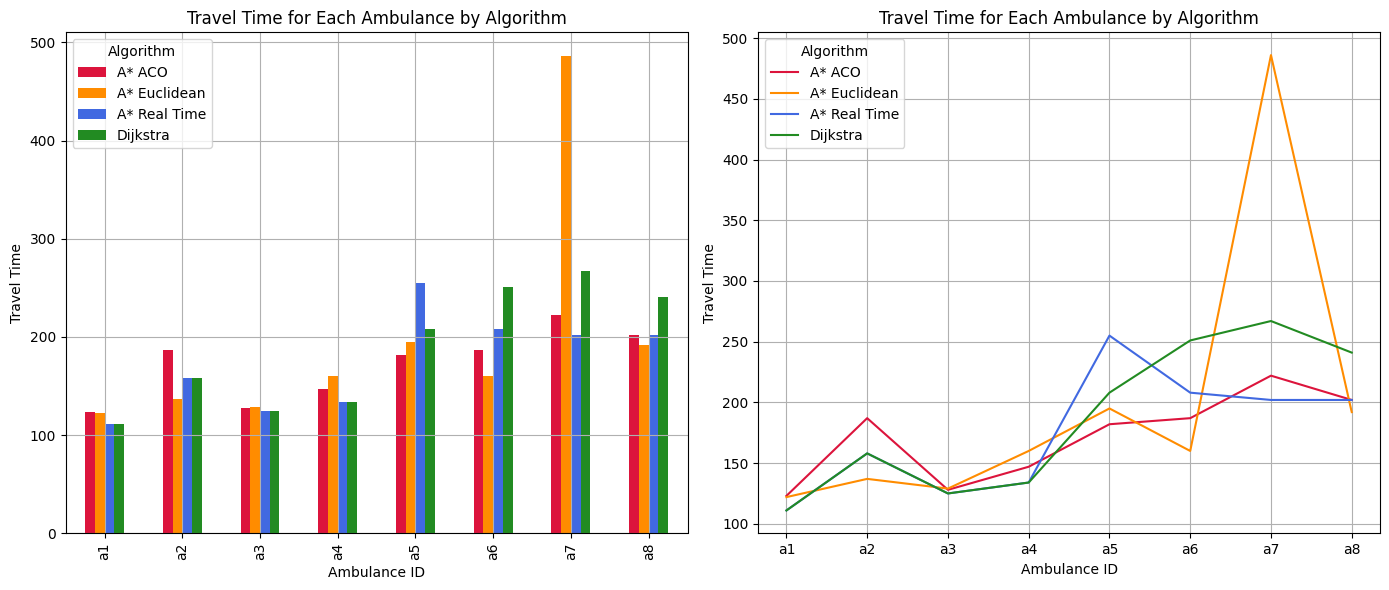

In [64]:
# Pivot the data to have Ambulance_ID as the index and Algorithm as columns
pivot_kyoto = kyoto_algo_compare.pivot(index='Ambulance_ID', columns='Algorithm', values='Travel_Time')

four_colors = ['#DC143C', '#FF8C00', '#4169E1', '#228B22']

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Adjust the figure size as needed
# Bar plot
pivot_kyoto.plot(kind='bar', color=four_colors, ax=axes[0])
axes[0].set_xlabel('Ambulance ID')
axes[0].set_ylabel('Travel Time')
axes[0].set_title('Travel Time for Each Ambulance by Algorithm')
axes[0].legend(title='Algorithm')
axes[0].grid(True)

# Line plot
pivot_kyoto.plot(kind='line', color=four_colors, ax=axes[1])
axes[1].set_xlabel('Ambulance ID')
axes[1].set_ylabel('Travel Time')
axes[1].set_title('Travel Time for Each Ambulance by Algorithm')
axes[1].legend(title='Algorithm')
axes[1].grid(True)

# Show the plots
plt.tight_layout()  # Ensures proper spacing between plots
plt.show()


### In More_Kyoto (Different part of the city)

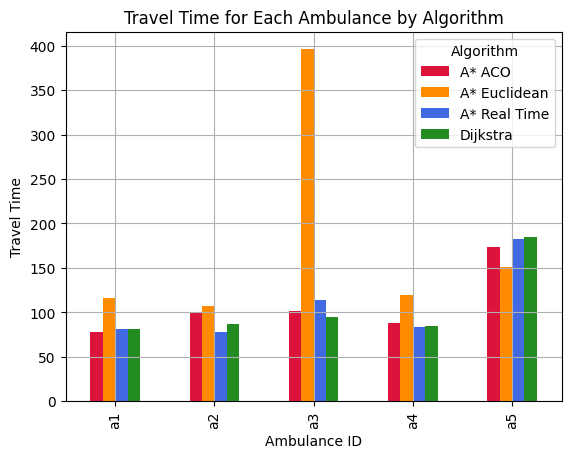

In [65]:
# Pivot the data to have Ambulance_ID as the index and Algorithm as columns
pivot_more_kyoto = more_kyoto_algo_compare.pivot(index='Ambulance_ID', columns='Algorithm', values='Travel_Time')

# Plot the pivoted dataframe
pivot_more_kyoto.plot(kind='bar', color=four_colors)
plt.xlabel('Ambulance ID')
plt.ylabel('Travel Time')
plt.title('Travel Time for Each Ambulance by Algorithm')
plt.legend(title='Algorithm')
plt.grid(True)
plt.show()

## Computation Time for Each Algorithm

### For routes in Manchester

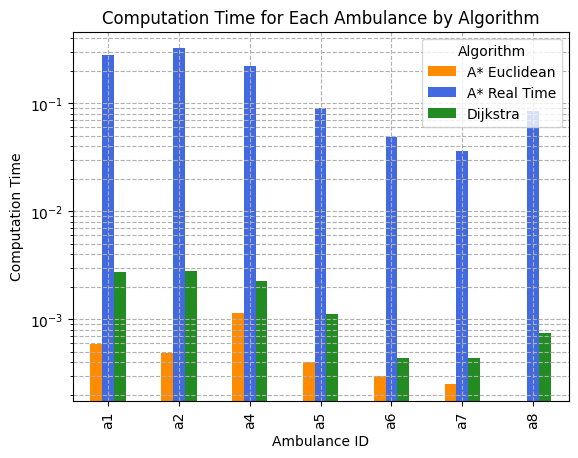

In [66]:
# Pivot the data to have Ambulance_ID as the index and Algorithm as columns
pivot_computation_time = manchester_algo_compare.pivot(index='Ambulance_ID', columns='Algorithm', values='Computation_Time')

# Plot the pivoted dataframe with a logarithmic scale on the y-axis
pivot_computation_time.plot(kind='bar', color=colors)
plt.xlabel('Ambulance ID')
plt.ylabel('Computation Time')
plt.title('Computation Time for Each Ambulance by Algorithm')
plt.yscale('log')
plt.legend(title='Algorithm')
plt.grid(True, which="both", ls="--")
plt.show()

### For routes in Kyoto

In [67]:
# Read the CSV file
kyoto_algo_compare = pd.read_csv('algorithm_comparison_results_kyoto.csv')

# Compute total computation time (computation + ACO overhead for A* ACO only)
kyoto_algo_compare['Total_Computation_Time'] = kyoto_algo_compare.apply(
    lambda row: row['Computation_Time'] + row['ACO_Time_Overhead'] if row['Algorithm'] == 'A* ACO' else row['Computation_Time'], axis=1
)

# Pivot the data to get Computation Time and ACO Overhead separately
pivot_computation = kyoto_algo_compare.pivot(index='Ambulance_ID', columns='Algorithm', values='Computation_Time').fillna(0)
pivot_aco_overhead = kyoto_algo_compare.pivot(index='Ambulance_ID', columns='Algorithm', values='ACO_Time_Overhead').fillna(0)

# Set non-ACO overhead values to zero (only applies to A* ACO)
pivot_aco_overhead = pivot_aco_overhead.map(lambda x: x if x > 0 else 0)

# Plot grouped stacked bars
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(pivot_computation))  # Positions for each ambulance
width = 0.2  # Bar width for each algorithm

colors = four_colors  # Colors for computation time
overhead_color = '#FFC5D3'  # Color for ACO overhead

for i, algorithm in enumerate(pivot_computation.columns):
    # Plot computation time
    ax.bar(x + i * width, pivot_computation[algorithm], width, label=f"{algorithm} (Computation)", color=colors[i % len(colors)])
    
    # Plot ACO overhead on top, but only for A* ACO
    if algorithm == 'A* ACO':
        ax.bar(x + i * width, pivot_aco_overhead[algorithm], width, bottom=pivot_computation[algorithm], label="A* ACO Overhead", color=overhead_color)

# Formatting
ax.set_xlabel("Ambulance ID")
ax.set_ylabel("Computation Time (log scale)")
ax.set_title("Stacked Grouped Bar Chart: Computation Time & ACO Overhead by Algorithm")
ax.set_xticks(x + width * (len(pivot_computation.columns) / 2 - 0.5))
ax.set_xticklabels(pivot_computation.index)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_yscale('log')  # Log scale for better visibility
ax.grid(True, which="both", linestyle="--")

plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'algorithm_comparison_results_kyoto.csv'

### For routes in More_Kyoto

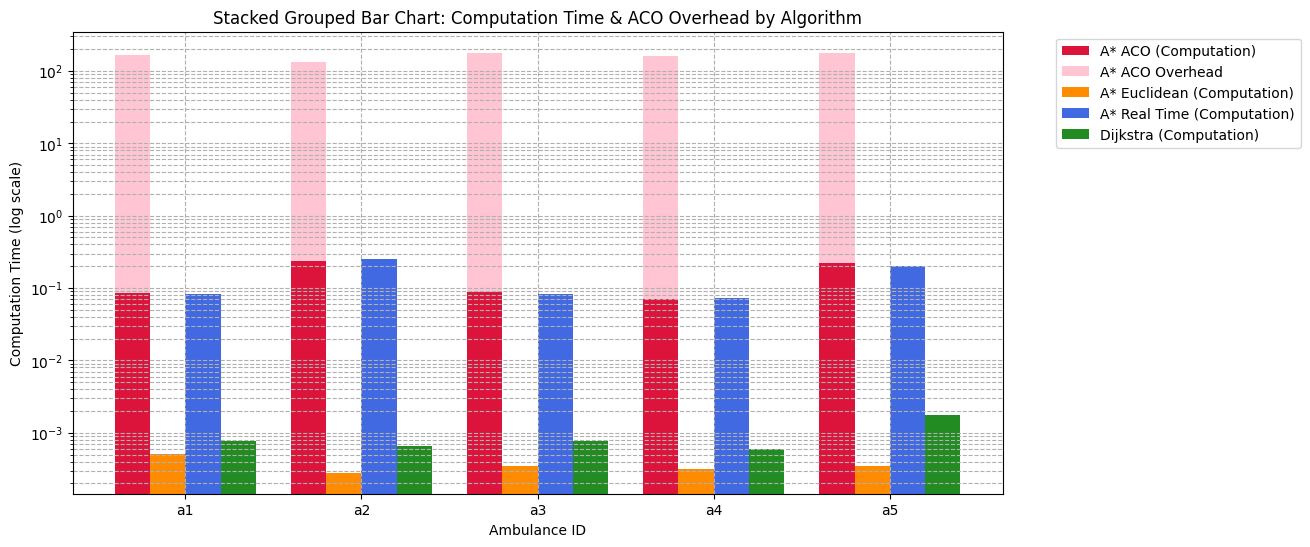

In [ ]:
# Read the CSV file
more_kyoto_algo_compare = pd.read_csv('algorithm_comparison_results.csv')

# Compute total computation time (computation + ACO overhead for A* ACO only)
more_kyoto_algo_compare['Total_Computation_Time'] = more_kyoto_algo_compare.apply(
    lambda row: row['Computation_Time'] + row['ACO_Time_Overhead'] if row['Algorithm'] == 'A* ACO' else row['Computation_Time'], axis=1
)

# Pivot the data to get Computation Time and ACO Overhead separately
pivot_computation = more_kyoto_algo_compare.pivot(index='Ambulance_ID', columns='Algorithm', values='Computation_Time').fillna(0)
pivot_aco_overhead = more_kyoto_algo_compare.pivot(index='Ambulance_ID', columns='Algorithm', values='ACO_Time_Overhead').fillna(0)

# Set non-ACO overhead values to zero (only applies to A* ACO)
pivot_aco_overhead = pivot_aco_overhead.map(lambda x: x if x > 0 else 0)

# Plot grouped stacked bars
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(pivot_computation))  # Positions for each ambulance
width = 0.2  # Bar width for each algorithm

colors = four_colors  # Colors for computation time
overhead_color = '#FFC5D3'  # Color for ACO overhead

for i, algorithm in enumerate(pivot_computation.columns):
    # Plot computation time
    ax.bar(x + i * width, pivot_computation[algorithm], width, label=f"{algorithm} (Computation)", color=colors[i % len(colors)])
    
    # Plot ACO overhead on top, but only for A* ACO
    if algorithm == 'A* ACO':
        ax.bar(x + i * width, pivot_aco_overhead[algorithm], width, bottom=pivot_computation[algorithm], label="A* ACO Overhead", color=overhead_color)

# Formatting
ax.set_xlabel("Ambulance ID")
ax.set_ylabel("Computation Time (log scale)")
ax.set_title("Stacked Grouped Bar Chart: Computation Time & ACO Overhead by Algorithm")
ax.set_xticks(x + width * (len(pivot_computation.columns) / 2 - 0.5))
ax.set_xticklabels(pivot_computation.index)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_yscale('log')  # Log scale for better visibility
ax.grid(True, which="both", linestyle="--")

plt.show()